In [1]:
import my_module as mm
nets = []
convs = [8, 16, 32, 64]
fcs = [152, 38, 14]
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
count = 0
DIR_PATH = './model/change_layer_disto/'
for i in range(2, -1, -1):
    for j in range(1, 5):
        net = mm.Net(1, 350, 350, 7, convs[:j], fcs[i:])
        count += 1
        PATH = DIR_PATH + "model_" + str(count)
        net.load_state_dict(mm.torch.load(PATH))
        nets.append(net)
print("Done")

Done


In [4]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories)
seed = 1234
Xtr, Xva, ytr, yva = mm.train_test_split(X, y, test_size=0.2, random_state=seed)
trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva)
print("Done")

Done


In [6]:
training_error = []
testing_error = []
count = 0
for net in nets:
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    count += 1
    print("Done for model", count)

Done for model 1
Done for model 2
Done for model 3
Done for model 4
Done for model 5
Done for model 6
Done for model 7
Done for model 8
Done for model 9
Done for model 10
Done for model 11
Done for model 12


[0.5962381300219137, 0.5149744338933528, 0.5389883126369612, 0.6115777940102265, 0.9638422205989774, 0.5678414901387874, 0.5128743608473338, 0.7870708546384222, 0.4988130021913806, 0.6022644265887509, 0.54172753834916, 0.5129656683710737]
[0.6018991964937911, 0.5193571950328707, 0.5514974433893353, 0.5949598246895544, 0.9674945215485756, 0.5737764791818846, 0.5113221329437545, 0.7881665449233017, 0.5076698319941564, 0.5858290723155588, 0.552227903579255, 0.5204528853177501]


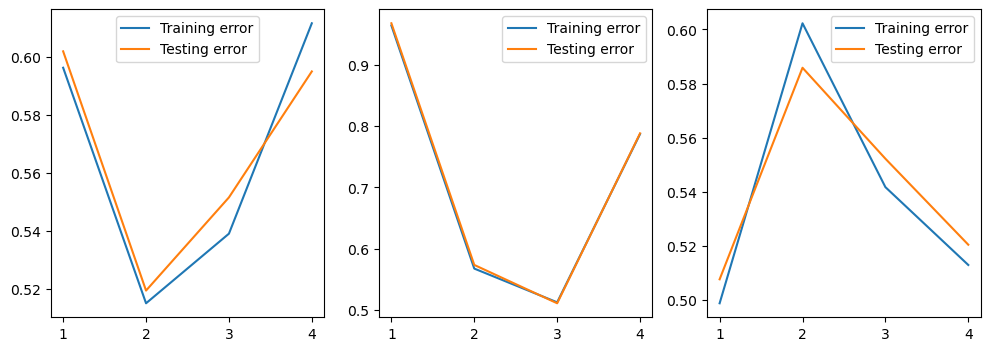

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(12,4))

print(training_error)
print(testing_error)

M = [1, 2, 3, 4]

for i in range(3):
    l = i * 4
    r = i * 4 + 4
    ax[i].plot(M, training_error[l:r], label="Training error")
    ax[i].plot(M, testing_error[l:r], label="Testing error")
    ax[i].legend()

# The output is wrong, just for debugging